In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class RL_Q_learning():
    def __init__(self):
        self.env = None
        
        self.learning_rate = 0.12
        self.epsilon = 0.1
        self.gamma = 0.99
        self.total_episodes = 3000
        self.max_steps = 10
        
        
        self.Q = None
    
    def take_action(self, state, close_epsilon):
        q = self.Q[state]
        if (close_epsilon or np.random.random() > self.epsilon) and any(q):
            action = np.argmax(q)
        else:
            action = self.env.action_space.sample()
        #print('debug: ',action)
        return action

    def start(self):
        #print hyper parameter
        print("Hyper Parameter")
        print("Learning rate : " + str(self.learning_rate), "\nEpsilon : " + str(self.epsilon))
        print("Discount(Gamma) : " + str(self.gamma), "\nTotal Episodes : " + str(self.total_episodes))
        print("Max steps per episode : " + str(self.max_steps))
        
        self.env = gym.make('FrozenLake-v0')
        self.Q = np.zeros((self.env.observation_space.n,self.env.action_space.n))
    
        
        avg_reward = []
        
        #learning
        for episode in range(self.total_episodes):
            state = self.env.reset()
            done = False
            
            tot_reward = 0

            for i in range(self.max_steps):
                #self.env.render()

                action = self.take_action(state, False)
                state2, reward, done, info = self.env.step(action)
                
                if reward == 0:
                    reward = -0.001
                
                #update q table
                #predict = np.max(self.Q[state2])
                self.Q[state,action] += self.learning_rate * (reward+max(self.Q[state2]) -self.Q[state,action])

                state = state2

                if done:
                    break
            
            #save reward of each episode
            #reward_each_episode.append(tot_reward)
            
            if episode % 100 == 0:
                __score = 0
                for i in range(50):
                    total_reward = 0
                    state = self.env.reset()
                    while True:
                        action = agent.take_action(state, close_epsilon=True)
                        next_state, reward, done, _ = self.env.step(action)
                        state = next_state
                        total_reward += reward
                        if done:
                            break
                    __score += total_reward
                __score /= 50
                
                avg_reward.append(__score)
                
                
        self.env.close()
        
        #plot the reward
        x = 100 * np.arange(len(avg_reward))
        y = np.asarray(avg_reward)
        plt.plot(x,y)
        plt.xlabel("Episode")
        plt.ylabel("Avg Reward")
        plt.title("Reward vs Episode During training")
        plt.show()
            
        
        

Hyper Parameter
Learning rate : 0.12 
Epsilon : 0.1
Discount(Gamma) : 0.99 
Total Episodes : 3000
Max steps per episode : 10


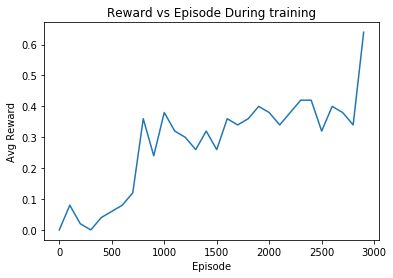

0.65
RL Hw1 step 5 Score: 87.75


In [13]:
if __name__ == '__main__':
    agent = RL_Q_learning()
    agent.start()

    import gym

    env = gym.make('FrozenLake-v0')

    __score = 0
    for i in range(1000):
        total_reward = 0
        state = env.reset()
        while True:
            action = agent.take_action(state, close_epsilon=True)
            next_state, reward, done, _ = env.step(action)
            state = next_state
            total_reward += reward
            if done:
                break
        __score += total_reward
    __score /= 1000
    print(__score)
    print("RL Hw1 step 5 Score:", min(__score * 135, 100))

In [19]:
from pandas import DataFrame

print('Q table')
display(DataFrame(agent.Q, index=list(range(1,17)) ,columns = ['Left','Down','Right','Up']))

print("若皆依照Q table走，會 1,1,1,1,1....")

Q table


,Left,Down,Right,Up
1,0.324011,0.291656,0.280705,0.296518
2,0.197932,0.133041,0.128556,0.222403
3,0.138775,0.001367,0.016720,0.066562
4,-0.001306,0.000981,-0.001315,-0.001367
5,0.331597,0.264877,0.230083,0.191554
6,0.000000,0.000000,0.000000,0.000000
7,0.005964,0.051691,0.121116,0.014759
8,0.000000,0.000000,0.000000,0.000000
9,0.249194,0.271883,0.259491,0.365545
10,0.163532,0.401040,0.219884,0.242344


若皆依照Q table走，會 1,1,1,1,1....


In [15]:
env = gym.make('FrozenLake-v0')
__score = 0
for i in range(1000):
    total_reward = 0
    state = env.reset()
    s = []
    while True:
        action = agent.take_action(state, close_epsilon=True)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        total_reward += reward
        s.append(state+1)
        if done:
            break
    __score += total_reward
    #print(total_reward)
    if(total_reward == 1.0):
        env.render()
        print(s)
__score /= 1000

  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 1, 1, 1, 5, 9, 9, 9, 10, 14, 10, 14, 10, 11, 7, 11, 7, 11, 15, 11, 10, 11, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 5, 5, 5, 9, 5, 9, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 9, 10, 11, 15, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 5, 9, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 5, 9, 5, 1, 5, 9, 5, 9, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 5, 5, 5, 9, 5, 5, 1, 5, 5, 5, 5, 5, 9, 9, 5, 9, 5, 5, 9, 5, 1, 5, 1, 5, 5, 9, 10, 14, 15, 11, 7, 3, 2, 2, 1, 1, 5, 5, 1, 5, 9, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 9, 9, 10, 9, 9, 5, 1, 1, 5, 9, 5, 1, 1, 1, 1, 1, 5, 9, 5, 5, 5, 9, 9, 5, 9, 10, 11, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 9, 5, 1, 1, 1, 1, 1, 5, 9, 5, 5, 5, 1, 1, 5, 5, 9, 10, 14, 10, 11, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 5, 5, 5,

SFFF
FHFH
FFFH
HFFG
[1, 5, 5, 5, 5, 9, 10, 14, 14, 15, 15, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 9, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[5, 9, 9, 5, 1, 5, 1, 1, 1, 1, 5, 5, 5, 5, 9, 10, 14, 10, 14, 15, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 9, 10, 9, 5, 5, 9, 9, 5, 5, 9, 9, 5, 5, 1, 5, 9, 9, 10, 14, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 5, 9, 9, 10, 14, 15, 15, 15, 15, 11, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 9, 5, 9, 9, 9, 10, 14, 14, 14, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 5, 1, 1, 1, 1, 5, 1, 5, 9, 10, 11, 7, 3, 2, 2, 3, 3, 3, 2, 2, 1, 5, 5, 5, 9, 10, 14, 14, 14, 10, 9, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 5, 1, 5, 9, 10, 9, 10, 11, 10, 11, 7, 11, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 5, 9, 9, 9, 10, 9, 9, 9, 5, 1, 5, 9, 5, 9, 5, 9, 9, 9, 10, 11, 15, 15, 16]
  (Right)
SFFF
FHFH
FFF

  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 9, 9, 5, 5, 5, 9, 10, 11, 7, 3, 2, 1, 1, 1, 1, 1, 5, 5, 9, 9, 5, 1, 1, 1, 1, 1, 5, 5, 1, 5, 5, 9, 5, 1, 1, 5, 1, 1, 5, 1, 5, 1, 5, 9, 9, 5, 9, 10, 11, 10, 14, 10, 9, 5, 5, 9, 5, 9, 9, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 9, 10, 9, 10, 9, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 5, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 5, 1, 5, 9, 5, 9, 10, 11, 10, 9, 10, 11, 10, 9, 5, 1, 5, 9, 5, 1, 1, 1, 5, 9, 5, 1, 1, 5, 5, 9, 9, 10, 11, 7, 11, 10, 9, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 5, 1, 1, 5, 1, 5, 9, 9, 9, 9, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 9, 10, 14, 14, 10, 14, 15, 11, 15, 11, 15, 15, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 5, 5, 9, 9, 5, 1, 1, 5, 5, 9, 10, 14, 10, 14, 10, 11, 7, 11, 15, 11, 10, 11, 7, 11, 10, 9, 10, 11, 7, 11, 10, 11, 10, 14, 14, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 5, 5, 1, 5, 9, 10, 14, 10, 9, 9, 10,

  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 1, 1, 5, 9, 9, 9, 5, 5, 1, 5, 1, 1, 1, 1, 1, 5, 5, 5, 9, 10, 11, 10, 11, 15, 11, 15, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 5, 9, 10, 11, 10, 9, 10, 14, 14, 14, 10, 9, 10, 9, 9, 9, 10, 14, 14, 15, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 5, 9, 10, 14, 14, 10, 9, 9, 5, 9, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 9, 10, 14, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 5, 9, 9, 5, 9, 10, 9, 9, 9, 9, 10, 9, 9, 9, 9, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[5, 1, 5, 9, 5, 5, 5, 9, 9, 9, 10, 9, 5, 5, 9, 5, 5, 5, 9, 5, 5, 9, 10, 11, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 5, 1, 5, 9, 10, 9, 10, 11, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 5, 5, 5, 9, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 9, 5, 1, 1, 1, 5, 9, 9, 10, 9, 10, 14, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[5, 9, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1

  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 9, 10, 14, 10, 9, 10, 9, 9, 9, 5, 1, 5, 5, 9, 10, 11, 10, 14, 15, 15, 11, 15, 11, 7, 11, 15, 11, 15, 11, 15, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 5, 9, 10, 11, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 1, 5, 5, 5, 5, 1, 1, 1, 5, 9, 9, 9, 9, 10, 14, 15, 11, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 5, 5, 9, 5, 1, 1, 5, 9, 5, 1, 5, 1, 1, 5, 9, 5, 5, 9, 5, 1, 1, 5, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 5, 9, 5, 5, 9, 5, 5, 1, 5, 9, 5, 1, 1, 5, 1, 5, 9, 5, 1, 5, 5, 9, 5, 9, 9, 10, 11, 10, 9, 10, 9, 5, 9, 10, 11, 15, 15, 11, 15, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[1, 1, 1, 1, 1, 5, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 9, 10, 11, 7, 3, 2, 2, 3, 3, 2, 1, 1, 5, 1, 5, 5, 5, 9, 5, 9, 9, 9, 5, 1, 1, 5, 9, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 9, 10, 14, 15, 11, 10, 9, 5, 9, 10, 9, 9, 9, 10, 9, 10, 14, 15, 16]
  (Right)
SFFF
FHFH
FFFH
HFFG
[5, 1,